<a href="https://colab.research.google.com/github/C0ntinue/EEE4178/blob/main/project4_20181485_20181573.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Webpage Ranking Algorithm

In [ ]:
# import dependency
import os
import numpy as np
import networkx as nx
import matplotlib as plt
from scipy.sparse import csr_matrix, csc_matrix

In [ ]:
def pageRank(A, s = .85, epsilon = .001):
  """
  Computes the pagerank for each of the n states.
  Used in webpage ranking and text summarization using unweighted
  or weighted transitions respectively.
  Args
  ----------
  A:adjacency matrix, Aij should be a boolean
    representing the transition weight from state i to j.

  Kwargs
  ----------
  s: probability for calculate google matrix, Defaults to 0.85
  epsilon: if the sum of pageranks between iterations is bellow this we will
          have converged. Defaults to 0.001
  """
  n = A.shape[0]
  A_hat = A
  # transform A into no dangling rows H
  for row,rsum in enumerate(np.sum(A,axis=1)):
    if rsum == 0:
      A_hat[row]=np.ones(n)

  print('A_hat:')
  print(A,end='\n\n')

    # transform A_hat into markorv matrix H_hat
  H_hat = csr_matrix(A_hat,dtype=np.float)
  rsums = np.array(H_hat.sum(1))[:,0]
  ri, ci = H_hat.nonzero()
  H_hat.data /= rsums[ri]
  print('H_hat:')
  print(np.round(np.asarray(H_hat.todense()),4),end='\n\n')
  # bool array of sink states
  sink = rsums==0

  # Compute pagerank r until we converge
  ro, r = np.zeros(n), np.ones(n)
  cnt = 0
  while np.sum(np.abs(r-ro)) > epsilon:
    cnt = cnt+1
    ro = r.copy()
    GoT = [] # Google matrix Transpose
    Go = [] #Google matrix
    # calculate each pagerank at a time
    for i in range(0,n):
      # inlinks of state i
      Ii = np.array(H_hat[:,i].todense())[:,0]
      # account for sink states
      Si = sink / float(n)
      # account for teleportation to state i
      Ti = np.ones(n) / float(n)
      GoT.append(Ii*s + Si*s + Ti*(1-s))
      r[i] = ro.dot(Ii*s + Si*s + Ti*(1-s))
      #print(Ii*s + Si*s + Ti*(1-s))
    print('iteration:'+str(cnt),end='\t importance scores of each nodes:')
    print(np.round(r/sum(r),4),end='\n')
  print('converges after '+str(cnt)+' iteration')
  Go = np.transpose(GoT)  
  print('\ngoogle matrix G:')
  print(np.round(Go,4))
 
  nodes = zip(range(1,n+1),list(r/sum(r)))
  nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
  print('\nPage Ranks:')
  for node in nodes: print(f'vertex {node[0]}: {node[1]}')
  
  
  # return normalized pagerank
  return nodes, Go

# Graph #1

In [ ]:
A1 = np.array((
    [0, 0, 0, 1],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 0, 0, 0]))

In [ ]:
G1 = nx.from_numpy_array(A1, parallel_edges=True,create_using=nx.DiGraph())

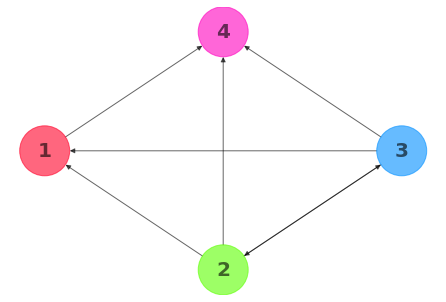

In [ ]:
mapping={0:1,1:2,2:3,3:4}
A1_=nx.relabel_nodes(G1,mapping)
nx.draw_shell(A1_, with_labels=True, node_color=range(A1.shape[0]), node_size=2500, alpha=0.6,cmap = plt.cm.gist_rainbow, font_size = 20, font_weight='bold')

In [ ]:
nodes1,_ = pageRank(A1, 0.85)

A_hat:
[[0 0 0 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 1]]

H_hat:
[[0.     0.     0.     1.    ]
 [0.3333 0.     0.3333 0.3333]
 [0.3333 0.3333 0.     0.3333]
 [0.25   0.25   0.25   0.25  ]]

iteration:1	 importance scores of each nodes:[0.2323 0.1615 0.1615 0.4448]
iteration:2	 importance scores of each nodes:[0.2235 0.1778 0.1778 0.421 ]
iteration:3	 importance scores of each nodes:[0.2277 0.1773 0.1773 0.4177]
iteration:4	 importance scores of each nodes:[0.2267 0.1765 0.1765 0.4203]
iteration:5	 importance scores of each nodes:[0.2268 0.1768 0.1768 0.4195]
iteration:6	 importance scores of each nodes:[0.2268 0.1768 0.1768 0.4196]
iteration:7	 importance scores of each nodes:[0.2268 0.1768 0.1768 0.4197]
converges after 7 iteration

google matrix G:
[[0.0375 0.0375 0.0375 0.8875]
 [0.3208 0.0375 0.3208 0.3208]
 [0.3208 0.3208 0.0375 0.3208]
 [0.25   0.25   0.25   0.25  ]]

Page Ranks:
vertex 4: 0.41965609489128836
vertex 1: 0.2268343734303336
vertex 2: 0.17675476583918903
vertex 3: 0.1767

# Graph #2

In [ ]:
A2 = np.array((
    [1, 1, 0, 0],
    [1, 1, 0, 0],
    [0, 0, 1, 1],
    [0, 0, 1, 1]))

In [ ]:
G2 = nx.from_numpy_array(A2, parallel_edges=True,create_using=nx.DiGraph())

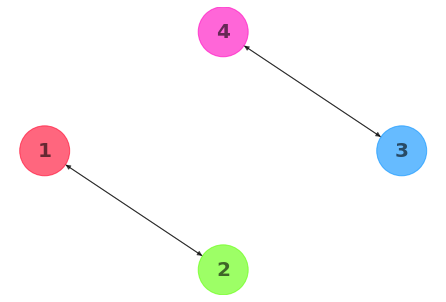

In [ ]:
mapping={0:1,1:2,2:3,3:4}
A2_=nx.relabel_nodes(G2,mapping)
nx.draw_shell(A2_, with_labels=True, node_color=range(A2.shape[0]), node_size=2500, alpha=0.6,cmap = plt.cm.gist_rainbow, font_size = 20, font_weight='bold')

In [ ]:
nodes2,_ = pageRank(A2, 0.85)

A_hat:
[[1 1 0 0]
 [1 1 0 0]
 [0 0 1 1]
 [0 0 1 1]]

H_hat:
[[0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]]

iteration:1	 importance scores of each nodes:[0.25 0.25 0.25 0.25]
converges after 1 iteration

google matrix G:
[[0.4625 0.4625 0.0375 0.0375]
 [0.4625 0.4625 0.0375 0.0375]
 [0.0375 0.0375 0.4625 0.4625]
 [0.0375 0.0375 0.4625 0.4625]]

Page Ranks:
vertex 1: 0.25
vertex 2: 0.25
vertex 3: 0.25
vertex 4: 0.25


# Graph #3

In [ ]:
A3 = np.array((
[0,1,1,0,0,0,0,0],
[1,0,0,0,1,0,0,0],
[0,1,0,0,0,0,0,1],
[0,0,1,0,0,0,0,0],
[0,0,0,1,0,0,0,1],
[0,0,0,1,1,0,0,0],
[0,0,0,1,0,1,0,0],
[1,0,0,1,0,0,1,0]))

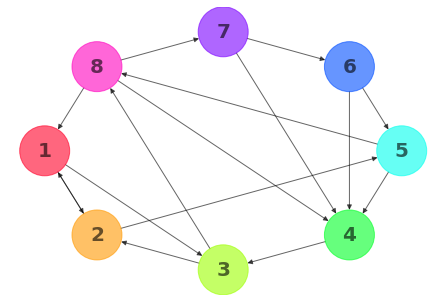

In [ ]:
G3 = nx.from_numpy_array(A3, parallel_edges=True,create_using=nx.DiGraph())
mapping={0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8}
A3_=nx.relabel_nodes(G3,mapping)
nx.draw_shell(A3_, with_labels=True, node_color=range(A3.shape[0]), node_size=2500, alpha=0.6,cmap = plt.cm.gist_rainbow, font_size = 20, font_weight='bold')

In [ ]:
nodes3,_ = pageRank(A3, 0.85)

A_hat:
[[0 1 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 1]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 0 1 0 0]
 [1 0 0 1 0 0 1 0]]

H_hat:
[[0.     0.5    0.5    0.     0.     0.     0.     0.    ]
 [0.5    0.     0.     0.     0.5    0.     0.     0.    ]
 [0.     0.5    0.     0.     0.     0.     0.     0.5   ]
 [0.     0.     1.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.5    0.     0.     0.     0.5   ]
 [0.     0.     0.     0.5    0.5    0.     0.     0.    ]
 [0.     0.     0.     0.5    0.     0.5    0.     0.    ]
 [0.3333 0.     0.     0.3333 0.     0.     0.3333 0.    ]]

iteration:1	 importance scores of each nodes:[0.1073 0.125  0.1781 0.2135 0.125  0.0719 0.0542 0.125 ]
iteration:2	 importance scores of each nodes:[0.1073 0.1401 0.2459 0.1609 0.1024 0.0418 0.0542 0.1476]
iteration:3	 importance scores of each nodes:[0.1201 0.1688 0.2011 0.1449 0.096  0.0418 0.0606 0.1668]
iteration:4	 importance scores of each nodes:[0.1